# Previously, we had been using Observed widths, but if we want to say anything about the physics of an FRB, we need to look at intrinsic widths. 


In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import astropy.table as Table

from astropy.io import ascii

Populating the interactive namespace from numpy and matplotlib


In [2]:
data  = ascii.read("20160321_FRB_cat.csv")
repeating  = ascii.read("20160321_FRB121102_cat.csv")

In [3]:
data

Name,Telescope,UTC,RAJ,DECJ,Pointing Error,FWHM,Sampling Time,Bandwidth,Centre Frequency,DM,DM error,SNR,Intrinsic Width,Width,Width error lower,Width error upper,Flux,Flux error lower,Flux error upper,DM Index,DM Index Error,Scattering Index,Scattering Index Error,Scattering Time,Scattering Time Error,Number of Channels,Reference
str9,str7,str19,str8,str9,int64,float64,float64,float64,float64,float64,str4,str2,str14,float64,str5,str5,float64,str5,str5,str5,str5,str4,str3,str5,str4,int64,str97
FRB010125,parkes,2001-01-25 00:29:14,19:06:53,-40:37:14,11,15.0,0.125,288.0,1372.5,790.0,3.0,17,5.52026308551,9.4,0.2,0.2,0.3,--,--,2.0,0.01,-4.2,1.2,--,--,96,"Burke-Spolaor S., Bannister K. W., 2014, ApJ, 792, 19"
FRB010621,parkes,2001-06-21 13:02:09,18:52:05,-08:29:35,11,15.0,0.25,288.0,1374.0,745.0,10.0,--,--,7.0,--,--,0.41,--,--,2.02,0.01,--,--,--,--,96,"Keane E. F., Kramer M., Lyne A. G., Stappers B. W., McLaughlin M. A., 2011, MNRAS, 415, 3065"
FRB010724,parkes,2001-07-24 19:50:00,01:18:06,-75:12:18,11,15.0,1.0,288.0,1374.0,375.0,--,23,3.47014621233,5.0,--,--,30.0,10.0,10.0,--,--,4.8,0.4,24.13,3.0,96,"Lorimer D. R., Bailes M., McLaughlin M. A., Narkevic, D. J., Crawford F., 2007, Science, 318, 777"
FRB090625,parkes,2009-06-25 21:53:49,03:07:47,-29:55:36,11,15.0,0.064,338.281,1352.0,899.55,0.01,30,1.64021409362,1.92,0.768,0.832,1.14,0.21,0.42,--,--,--,--,3.7,0.7,1024,"Champion et al. 2015, submitted"
FRB110220,parkes,2011-02-20 01:55:46,22:34:38,-12:23:45,11,15.0,0.064,338.281,1352.0,944.38,0.05,49,5.50110400049,5.6,0.1,0.1,1.3,0.0,0.0,2.003,0.006,-4.0,0.4,--,--,1024,"Thornton D. et al., 2013, Science, 341, 53"
FRB110523,GBT,2011-05-23 15:06:19,21:45:12,-00:09:37,0,16.0,1.024,200.0,800.0,623.3,0.06,42,1.65815655612,1.73,0.17,0.17,0.6,--,--,1.998,0.003,-3.6,1.4,0.71,0.09,4096,"Masui K. et al., 2015, Nature"
FRB110626,parkes,2011-06-26 21:33:15,21:03:43,-44:44:19,11,15.0,0.064,338.281,1352.0,723.0,0.3,11,1.14740165466,1.4,--,--,0.4,--,--,--,--,--,--,--,--,1024,"Thornton D. et al., 2013, Science, 341, 53"
FRB110703,parkes,2011-07-03 18:59:38,23:30:51,-02:52:24,11,15.0,0.064,338.281,1352.0,1103.6,0.7,16,4.12198346958,4.3,--,--,0.5,--,--,2.0,0.006,--,--,--,--,1024,"Thornton D. et al., 2013, Science, 341, 53"
FRB120127,parkes,2012-01-27 08:11:20,23:15:06,-18:25:38,11,15.0,0.064,338.281,1352.0,553.3,0.3,11,0.912768533255,1.1,--,--,0.5,--,--,--,--,--,--,--,--,1024,"Thornton D. et al., 2013, Science, 341, 53"


In [4]:
def intrinsic(W_obs, W_DM):
    ''' Calulate intrisic width using 
    W_obs^2 = W_int^2 + W_DM^2'''
    
    return np.sqrt(W_obs**2.0-W_DM**2.0)

In [5]:
def W_DM(DM, Nu, dNu):
    '''Calculate W_DM
    DM = Dispersion measure
    Nu = Center freqency of channel
    dNu = Bandwidth of channel/ number of channels'''
     
    return 8.3e6 * DM * dNu /Nu**3.0 

In [6]:
W_int = intrinsic(data['Width'], W_DM(data['DM'], data['Centre Frequency'], data['Bandwidth']/data['Number of Channels']))

/Users/karaponder/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


In [7]:
W_int

5.52026308551
nan
3.47014621233
1.64021409362
5.50110400049
1.65815655612
1.14740165466
4.12198346958
0.912768533255
5.13091575988
2.93987440545


In [8]:
W_int_repeating = intrinsic(repeating['Width'], \
                            W_DM(repeating['DM'],repeating['Centre Frequency'], \
                                 repeating['Bandwidth']/repeating['Number of Channels']))

In [9]:
W_int_repeating

2.93987440545
3.75219989692
3.24364409245
4.56129604872
8.67937659076
2.7350122827
nan
6.57293712234
5.97012130445
7.97751077552
3.00118350226


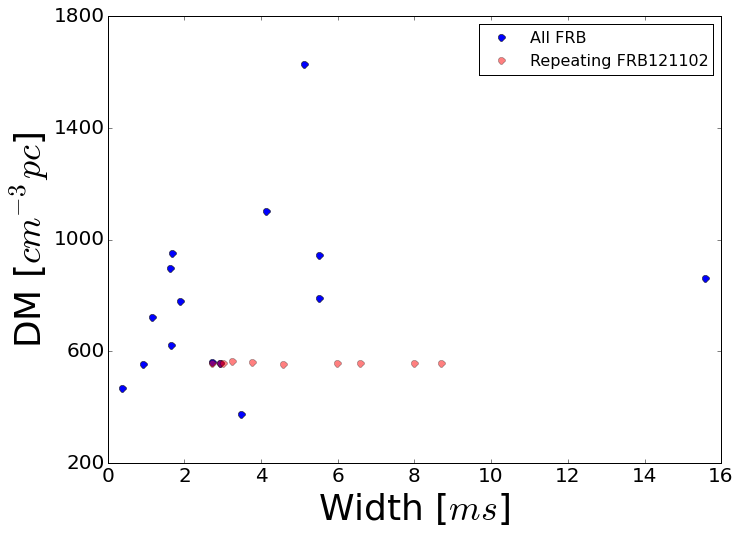

In [10]:
plt.figure(figsize=(11,8))

plt.plot(W_int, data['DM'], 'o', ms = 7, label = 'All FRB')
plt.plot(W_int_repeating, repeating['DM'], 'ro', ms = 7, alpha = 0.5, label = 'Repeating FRB121102')

plt.xlabel(r'Width [$ms$]',fontsize=36 )
plt.ylabel(r'DM [$cm^{-3} pc$]', fontsize=36)

#plt.xlim(0.5, 16)
plt.xticks(fontsize = 20)
plt.yticks(np.linspace(200, 1800, 5), fontsize = 20)
plt.legend( numpoints=1, loc = 1, fontsize=16)
#plt.savefig('20160331_W_int_DM_with_repeating.pdf')